# Analysis of headlines about the deaf over the last 169 years

Load dependencies.

In [235]:
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

Load all headlines from the last 169 years.

In [217]:
all_files = glob.glob("headlines/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df['date'] = pd.to_datetime(df['date']) # sets format of "date" column as datetime
df = df[df['headline'].notna()].drop_duplicates().sort_values(by='date') 
df['keywords'] = df['keywords'].apply(literal_eval)

In [5]:
df

,headline,date,doc_type,material_type,section,keywords
56,From Bosoton--Specie arrived by the Europa-Mov...,1851-09-18,article,Archives,NaN,[]
58,New-York State Fair.,1851-09-18,article,Archives,NaN,[]
57,Texan Stock-Decision of the President.,1851-09-18,article,Archives,NaN,[]
55,Article 15 -- No Title,1851-09-18,article,Archives,NaN,[]
54,Article 8 -- No Title,1851-09-18,article,Archives,NaN,[]
...,...,...,...,...,...,...
4930,"For Kenny Chesney and Others, Promotion in a P...",2020-05-25,article,News,NaN,"[Country Music, Books and Literature, Coronavi..."
4929,"The Future of College Is Online, and It’s Cheaper",2020-05-25,article,Op-Ed,NaN,"[Colleges and Universities, E-Learning, Comput..."
4928,Your Tuesday Briefing,2020-05-25,article,briefing,NaN,[]
4965,He Died at War. The Pandemic Gave Me Time to G...,2020-05-25,article,News,NaN,"[United States Defense and Military Forces, Da..."


We have almost 14.9 million headlines!

The New York Times assigns some keywords that are related to the deaf. Look at all possible keywords.

In [65]:
keyword_counts = pd.Series(x.lower() for l in df['keywords'] for x in l).value_counts(ascending=False)
keyword_counts = keyword_counts[keyword_counts >= 2]
len(keyword_counts)

73290

We have 73,290 unique keywords.

In [8]:
deaf_keywords = [x for x in keyword_counts.keys() if 'deaf' in x 
                 or 'sign language' in x 
                 or 'ears and hearing' in x 
                 or 'hearing aids' in x 
                 or 'cochlear implant' in x]
deaf_keywords

['deafness',
 'ears and hearing',
 'deafness and deaf mutes',
 'deafness and deaf-mutes',
 'sign language',
 'hearing aids',
 'deafness and deaf‐mutes',
 'deaf mutes',
 'deaf, the',
 'cochlear implants',
 'deaf',
 'deaf-mutes',
 'deaf drivers',
 'sign languages',
 'deaf voters',
 'international deaf mute olympics',
 'deaf, games for the',
 'deaf children']

Overall keyword count.

In [24]:
keyword_counts.head(25)

politics and government               245855
deaths                                236885
company reports                       185307
books and literature                  175884
elections                             173335
general                               169616
reviews                               151581
finances                              144086
music                                 138919
deaths and death rate                 135094
labor                                 134820
miscellaneous section                 131649
european war                          128174
baseball                              123570
stocks and bonds                      107771
education and schools                 105014
world war ii                          100333
terms not available                   100237
art                                    96798
football                               95215
international relations                94643
united states armament and defense     89521
biographic

Overall deaf keyword count.

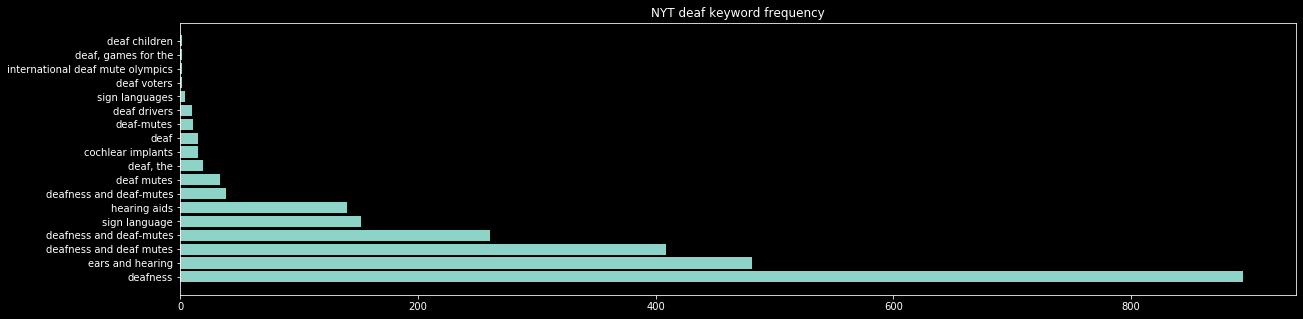

In [26]:
keyword_counts_list = list(keyword_counts.keys())
frequencies = []
for keyword in deaf_keywords:
    index = keyword_counts_list.index(keyword)
    frequencies.append(keyword_counts.iloc[index])
    
plt.figure(figsize=(20, 5))
plt.barh(deaf_keywords, frequencies)
plt.title('NYT deaf keyword frequency')
plt.show()

Get time ranges for each keyword.

In [49]:
# If a keyword shows up in 
df['SERMONS' in df['keywords'].iloc[5000000]]

KeyError: True

In [51]:
df['keywords'].iloc[]

56                                                     []
58                                                     []
57                                                     []
55                                                     []
54                                                     []
                              ...                        
4930    [Country Music, Books and Literature, Coronavi...
4929    [Colleges and Universities, E-Learning, Comput...
4928                                                   []
4965    [United States Defense and Military Forces, Da...
4853                            [Coronavirus (2019-nCoV)]
Name: keywords, Length: 14910907, dtype: object

In [83]:
ranges = {}
for dk in deaf_keywords:
    dk_df = df.loc[[(dk in map(str.lower, x)) for x in df['keywords']]]
    first_appearance = dk_df['date'].iloc[0].strftime('%Y')
    last_appearance = dk_df['date'].iloc[-1].strftime('%Y')
    ranges[dk] = [first_appearance, last_appearance]

Check ranges of time where each word (from list of words about the deaf) appears in headlines.

In [86]:
for i in ranges:
    print(i + ': ' + str([x.strftime('%Y') for x in ranges[i]]))

deafness: ['1879', '2020']
ears and hearing: ['1912', '2020']
deafness and deaf mutes: ['1932', '1963']
deafness and deaf-mutes: ['1959', '1979']
sign language: ['1933', '2020']
hearing aids: ['1983', '2020']
deafness and deaf‐mutes: ['1970', '1979']
deaf mutes: ['1914', '1930']
deaf, the: ['1918', '1928']
cochlear implants: ['1984', '2020']
deaf: ['1925', '1930']
deaf-mutes: ['1914', '1931']
deaf drivers: ['1923', '1927']
sign languages: ['1941', '1943']
deaf voters: ['1924', '1924']
international deaf mute olympics: ['1931', '1931']
deaf, games for the: ['1935', '1935']
deaf children: ['1926', '1926']


In [121]:
import numpy as np

In [145]:
y = ranges.keys()
x_begin = np.fromiter((ranges[i][0].strftime('%Y') for i in ranges), dtype=int)
x_end = np.fromiter((ranges[i][1].strftime('%Y') for i in ranges), dtype=int)

In [146]:
x_begin

array([1879, 1912, 1932, 1959, 1933, 1983, 1970, 1914, 1918, 1984, 1925,
       1914, 1923, 1941, 1924, 1931, 1935, 1926])

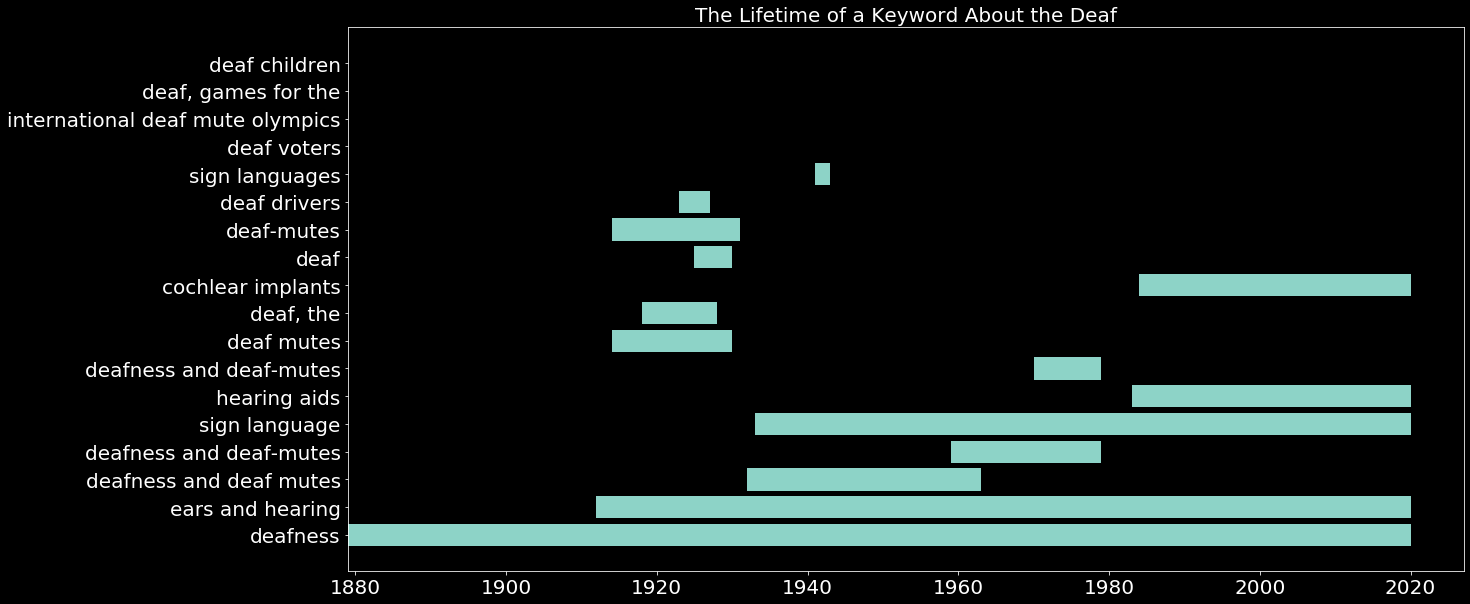

In [174]:
plt.figure(figsize=(20, 10))
plt.barh(range(len(x_begin)), x_end-x_begin, left=x_begin)
plt.yticks(range(len(x_begin)), y, fontsize=20)
plt.xticks(fontsize=20)
plt.title('The Lifetime of a Keyword About the Deaf', fontsize=20)
plt.show()

Some of them don't show up because they're only present for a month, too small to show up in this view of 169 years.

In [221]:
deaf_and_dumb = df[df['headline'].str.lower().str.contains('deaf and dumb')]

In [222]:
deaf_and_dumb

,headline,date,doc_type,material_type,section,keywords
851,Institution for the Deaf and Dumb.,1852-05-14,article,Archives,NaN,[]
892,The Deaf and Dumb.,1852-07-15,article,Archives,NaN,[]
1916,BROOKLYN CITY.; MARRIAGE AT THE DEAF AND DUMB INSTITUTE. SUDDEN DEATH. COUP DE SOLEIL SHOCKING A...,1852-07-29,article,Archives,NaN,[]
1159,The Deaf and Dumb.,1852-10-12,article,Archives,NaN,[]
1903,Quarterly Examination of Pupils at Pupils at the Deaf and Dumb Institute.,1852-11-20,article,Archives,NaN,[]
...,...,...,...,...,...,...
9642,GERMANS WIN AT FOOTBALL; Score in Deaf and Dumb Meet-- Italian Cyclists Triumph.,1931-08-24,article,Article,NaN,[]
11223,"! SIR PHILIP MAGNUS, I EDUCATOR, 90, DIES; Former Member of Parliament Led in Fight to Establish...",1933-08-30,article,Obituary,NaN,[LONGEVITY]
5576,Corcoran 'Deaf and Dumb' When Queried on Tydings,1938-09-15,article,Front Page,NaN,[]
7757,Treasure Chest; The Deaf and Dumb,1945-09-23,article,Article,NaN,[]


209 articles about the "deaf and dumb".

In [223]:
print('Range: ' + str(deaf_and_dumb.iloc[0]['date'].strftime('%Y')) + '—' + str(deaf_and_dumb.iloc[-1]['date'].strftime('%Y')))

Range: 1852—1958


Most common words.

In [234]:
deaf_and_dumb['headline'].str.split(expand=True).stack()

851   0    Institution
      1            for
      2            the
      3           Deaf
      4            and
              ...     
7757  5           Dumb
3801  0           Deaf
      1            and
      2           Dumb
      3    Pickpockets
Length: 4150, dtype: object

In [257]:
stop = stopwords.words('english')
stop.append('deaf')
stop.append('dumb')

In [260]:
deaf_and_dumb['headline'].str.lower().str.replace('[^\w\s]','').apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)])).str.split(expand=True).stack().value_counts().head(10)

institution    47
newyork        33
city           29
board          17
new            16
american       16
pupils         14
instruction    13
institute      13
school         12
dtype: int64

We expect this usage of deaf and dumb. Institution. It used to be the name.

## Deaf drivers

In [213]:
df.loc[[('deaf drivers' in map(str.lower, x)) for x in df['keywords']]]

,headline,date,doc_type,material_type,section,keywords
9810,Deaf Object to Any Auto Ban.,1923-06-29,article,Article,NaN,"[AUTOMOBILES, DEAF DRIVERS, DEAF, THE]"
5412,"BARS DEAF MUTE DRIVERS.; Maryland Court, In Test Case, Denies Them Autoists' Rights.",1925-02-15,article,Article,NaN,"[AUTOMOBILES, DRIVERS, DEAF DRIVERS, DEAF MUTES]"
10717,Resists New Law on Deaf Mutes.,1925-03-28,article,Article,NaN,"[AUTOMOBILES, DRIVERS, DEAF DRIVERS, AUTOMOBILES, DRIVERS, CRIPPLED DRIVERS]"
280,SAYS DEAF MAY DRIVE AUTOS IN NEW JERSEY; Attorney General Rules Defective Hearing Is No Bar to G...,1925-04-03,article,Article,NaN,"[TRANSIT, AUTOMOBILES, DEAF DRIVERS, ELEVATED RYS]"
1216,RETRIAL FOR FARINA SOUGHT BY COUNSEL; Governor to Be Asked to Extend Stay of Executions in West ...,1925-04-04,article,Article,NaN,"[MURDERS, WEST END BANK MESSENGERS, AUTOMOBILES, DEAF DRIVERS]"
12128,COURT FINES DEAF MUTE.; Talks to Him in Sign Language That Policeman Didn't Understand.,1927-10-27,article,Article,NaN,"[AUTOMOBILES, DEAF DRIVERS]"
10839,"TAKES DRIVING TEST FOR A DEAF-MUTE; Youth, Found Out Only Through Age Discrepancy, Gets 90 Days ...",1927-11-24,article,Article,NaN,"[AUTOMOBILES, DEAF DRIVERS]"
12688,"DENIES DEAF ARE UNFIT TO DRIVE AUTOMOBILES; M.L. Kenner, in Letter to Judge McAdoo, Says They Ar...",1927-11-28,article,Article,NaN,"[AUTOMOBILES, DEAF DRIVERS]"
13132,"OFFERS TO PAY BOY'S FINE.; Woman Sends $150, but the Accused Has Settled Case.",1927-11-29,article,Article,NaN,"[AUTOMOBILES, DEAF DRIVERS]"
2398,Deaf Automobile Drivers.,1927-12-06,article,Letter,NaN,"[AUTOMOBILES, DEAF DRIVERS]"


## Sign language

In [214]:
sl_df = df.loc[[('sign language' in map(str.lower, x)) for x in df['keywords']]]

In [215]:
sl_df.head()

,headline,date,doc_type,material_type,section,keywords
7225,R.S. PIERREPONT INJURED.; New Yorker Breaks Collarbone in South in Fall From Horse.,1933-01-15,article,Article,NaN,"[ACCIDENTS, HORSEBACK RIDING, SIGN LANGUAGE, DISPATCHES]"
8917,Chimps Learning Signs Faster With Deaf,1975-02-26,article,Archives,NaN,"[Sign Language, DEAFNESS AND DEAF‐MUTES, Monkeys and Apes]"
4347,PATENTS;\nClassroom Signals For Deaf Students,1983-01-15,article,News,NaN,"[INVENTIONS AND INVENTORS, Sign Language, Deafness, Children and Youth, Education and Schools]"
4240,Performance of 'Evita' To Be Signed for Deaf,1983-02-12,article,News,NaN,"[Sign Language, Theater]"
7265,'PARZIVAL' STAGED BY AND FOR THE DEAF,1983-03-18,article,Review,NaN,"[Deafness, Sign Language, Theater]"


In [216]:
sl_df.tail()

,headline,date,doc_type,material_type,section,keywords
5523,"Harlan Lane, Vigorous Advocate for Deaf Culture, Dies at 82",2019-07-28,article,Obituary (Obit),NaN,"[Deafness, Psychology and Psychologists, Language and Languages, Sign Language, Disabilities, De..."
94,I Performed at the Super Bowl. You Might Have Missed Me.,2020-02-03,article,Op-Ed,NaN,"[Super Bowl, Football, Disabilities, Deafness, Sign Language, Television, National Anthems, Disc..."
3332,Harriet Tubman on a Debit Card: A Tribute or a Gaffe?,2020-02-17,article,News,NaN,"[Black People, Banking and Financial Institutions, Slavery (Historical), Debit Cards, Sign Langu..."
6414,How Do You Sign ‘Don’t Drink Bleach’?,2020-04-27,article,News,NaN,"[Coronavirus (2019-nCoV), Disabilities, Deafness, Sign Language, Translation and Interpreters, L..."
1430,Mothering While Deaf in a Newly Quiet World,2020-05-08,article,News,NaN,"[Love (Emotion), Deafness, Disabilities, Sign Language, Parenting, Coronavirus (2019-nCoV)]"


## Li